<h1 style="color:indigo"> *Predicciones de clasificación de cobertura del suelo utilizando Spark</h1>

<p>Autor: <a href="https://www.linkedin.com/in/albertoav" style="text-decoration:none;">Alberto Álvarez Vales</a>     
</p>
Fecha: 22/03/2019

In [1]:
!pip install geopandas #se debe instalar geopandas si no lo está para los formatos gpkg

In [1]:
from geopandas import read_file,GeoDataFrame

In [2]:
from pyspark import SparkContext
sc = SparkContext.getOrCreate()
from pyspark.sql import SQLContext
spark = SQLContext(sc)

In [3]:
datosGlobales=read_file("segmented_TopFixed.gpkg")

In [4]:
dfGlobal=spark.createDataFrame(datosGlobales)

In [5]:
dfGlobal.show(2)

+---+------+---------+--------------+--------+-----------+------------------+---------+------------------+------+------+------------------+--------+------------------+---------+------------------+------+------+------------------+---------+------------------+---------+------------------+------+------+------------------+--------------------+
|cat|  area|perimeter|compact_circle|      fd|     B1_sum|           B1_mean|B1_median|          B1_stdev|B1_min|B1_max|       B1_variance|  B2_sum|           B2_mean|B2_median|          B2_stdev|B2_min|B2_max|       B2_variance|   B3_sum|           B3_mean|B3_median|          B3_stdev|B3_min|B3_max|       B3_variance|            geometry|
+---+------+---------+--------------+--------+-----------+------------------+---------+------------------+------+------+------------------+--------+------------------+---------+------------------+------+------+------------------+---------+------------------+---------+------------------+------+------+---------------

In [6]:
from pyspark.ml.feature import VectorAssembler

In [7]:
columnas=['area', 'perimeter',  'fd', 'perimeter', 'compact_circle', 'fd', 'B1_sum', 'B1_mean', 'B1_median', 'B1_stdev', 'B1_min', 'B1_max', 'B1_variance', 'B2_sum', 'B2_mean', 'B2_median', 'B2_stdev', 'B2_min', 'B2_max', 'B2_variance', 'B3_sum', 'B3_mean', 'B3_median', 'B3_stdev', 'B3_min', 'B3_max', 'B3_variance']
constructor=VectorAssembler(inputCols=columnas,
                            outputCol="features")

In [8]:
dfEF=constructor.transform(dfGlobal).select("cat","features")

In [9]:
from pyspark.ml.classification import RandomForestClassificationModel

In [10]:
modelo=RandomForestClassificationModel().read().load("modelorf")

In [11]:
pred=modelo.transform(dfEF).select("cat","prediction")

In [12]:
import pandas as pd

predPandas=pd.merge(datosGlobales, pred.toPandas(), on='cat', how='inner')

In [13]:
geoPredPandas=GeoDataFrame(predPandas)

In [14]:
geoPredPandas.to_file("prediccion.gpkg",driver="GPKG")

In [1]:
visual=geoPredPandas.plot(figsize=(20,15))

NameError: name 'geoPredPandas' is not defined

# Script de Python para subir a GitLab

In [1]:
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassificationModel
from geopandas import read_file,GeoDataFrame
import pandas as pd

sc = SparkContext.getOrCreate()
spark = SQLContext(sc)

datosGlobales=read_file("segmented_TopFixed.gpkg")

dfGlobal=spark.createDataFrame(datosGlobales)

columnas=['area', 'perimeter',  'fd', 'perimeter', 'compact_circle', 'fd', 'B1_sum', 'B1_mean', 'B1_median', 'B1_stdev', 'B1_min', 'B1_max', 'B1_variance', 'B2_sum', 'B2_mean', 'B2_median', 'B2_stdev', 'B2_min', 'B2_max', 'B2_variance', 'B3_sum', 'B3_mean', 'B3_median', 'B3_stdev', 'B3_min', 'B3_max', 'B3_variance']
constructor=VectorAssembler(inputCols=columnas,outputCol="features")

dfEF=constructor.transform(dfGlobal).select("cat","features")

modelo=RandomForestClassificationModel().read().load("modelorf")

pred=modelo.transform(dfEF).select("cat","prediction")

predPandas=pd.merge(datosGlobales, pred.toPandas(), on='cat', how='inner')

geoPredPandas=GeoDataFrame(predPandas)

geoPredPandas.to_file("prediccion.gpkg",driver="GPKG")

<a href="mailto:alberto@torredebabel.com" style="text-decoration:none;" title="Alberto Álvarez Vales">
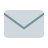</a>
<a href="https://www.linkedin.com/in/albertoav" style="text-decoration:none;" title="Alberto Álvarez Vales">
</a> 